In [1]:
from tweakwcs import JWSTgWCS
from jwst import datamodels
import numpy as np
import glob

In [2]:


RAD2ARCSEC = 3600.0 * np.rad2deg(1.0)

filter = "F560W"
twfiles = np.sort(glob.glob(f"../sexa/miri_aug24/{filter}/stage3/*_tweakreg.fits"))
print(twfiles)
shifts = np.zeros((2, len(twfiles)))
for k, cfile in enumerate(twfiles):
    # extract x,y shifts from the aligned image:
    aligned_model = datamodels.open(cfile)
    matrix = aligned_model.meta.wcs.forward_transform['tp_affine'].matrix.value
    cshift = RAD2ARCSEC * aligned_model.meta.wcs.forward_transform['tp_affine'].translation.value
    shifts[:, k] = cshift
    print(cfile, cshift)



['../sexa/miri_aug24/F560W/stage3/jw02391005001_02101_00001_mirimage_skysub_tweakreg.fits'
 '../sexa/miri_aug24/F560W/stage3/jw02391005001_02101_00002_mirimage_skysub_tweakreg.fits'
 '../sexa/miri_aug24/F560W/stage3/jw02391005001_02101_00003_mirimage_skysub_tweakreg.fits'
 '../sexa/miri_aug24/F560W/stage3/jw02391005001_02101_00004_mirimage_skysub_tweakreg.fits']
../sexa/miri_aug24/F560W/stage3/jw02391005001_02101_00001_mirimage_skysub_tweakreg.fits [-0.23607643  0.0137704 ]
../sexa/miri_aug24/F560W/stage3/jw02391005001_02101_00002_mirimage_skysub_tweakreg.fits [-0.23447192  0.01185539]
../sexa/miri_aug24/F560W/stage3/jw02391005001_02101_00003_mirimage_skysub_tweakreg.fits [-0.23584804  0.00595085]
../sexa/miri_aug24/F560W/stage3/jw02391005001_02101_00004_mirimage_skysub_tweakreg.fits [-0.22814244  0.01368642]


0 -0.23363470808898834 0.011315765654765218


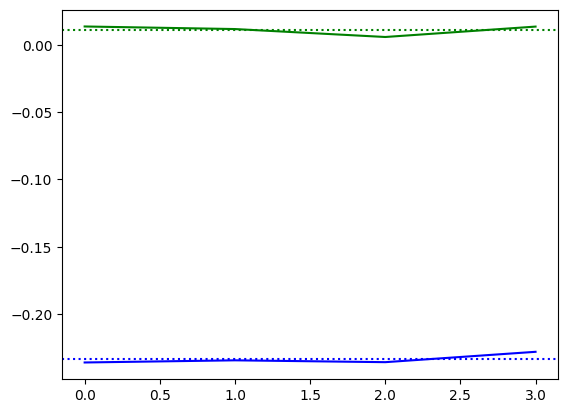

In [4]:
import matplotlib.pyplot as plt

plt.plot(range(len(twfiles)), shifts[0, :], "b-")
plt.plot(range(len(twfiles)), shifts[1, :], "g-")

from astropy.stats import sigma_clip

# determine the aveage values for each tile
for k in range(1):
    avex = np.average(sigma_clip(shifts[0, :]))
    avey = np.average(sigma_clip(shifts[1, :]))
    print(k, avex, avey)
    plt.axhline(avex, linestyle="dotted", color="b")
    plt.axhline(avey, linestyle="dotted", color="g")